In [1]:
# Importamos los paquetes
import pandas as pd # Manejo de bases de datos
import geopandas as gpd # Manejo de bases de datos geográficas
import numpy as np # Funciones numéricas
import matplotlib.pyplot as plt # Gráficas
import seaborn as sns # Gráficas
import datetime as dt 


import esda # Exploratory Spatial Data Analysis
import libpysal as lps # Librería de python para análisis espacial
#from tabulate import tabulate

### Moran I analysis for selected featrues between localities

In [2]:
# Read GeodataFrame previously constructed
path = '/home/ubuntu/javeriana/MOTUS-PUJ/Step_2/1_spatial/Outputs/LocalidadGDF.gzip'
LocGDF = pd.read_pickle(path, compression='gzip')
LocGDF.head(2)

,Name,Id,geometry,Hospitals,N_Hospitals,IPS,N_IPS,Colegios,N_Colegios,PlazaMer,N_PlazaMer,Turismo,N_Turismo,SITP,N_SITP,Comercio,N_Comercio
0,usaquen,1,"POLYGON ((-74.01116 4.66459, -74.01117 4.66460...","[POINT (-74.03049903995752 4.696348669863934),...",9,"[POINT (-74.05239073194667 4.707054002140524),...",522,"[POINT (-74.05148000010526 4.707330000137796),...",155,[],0,"[POINT (-74.03800200007751 4.706198999783834),...",24,"[POINT (-74.04845399989965 4.709916000204656),...",641,"[POINT (-74.05215223819999 4.70672435378), POI...",29430
1,chapinero,2,"POLYGON ((-74.01116 4.66459, -74.01154 4.66461...",[],0,"[POINT (-74.06457413998453 4.630227659978573),...",499,"[POINT (-74.06135000033767 4.657600000270593),...",28,[],0,"[POINT (-74.05759900042719 4.65167600012609), ...",34,"[POINT (-74.0601199998473 4.628508999872917), ...",298,"[POINT (-74.05968344760001 4.62798567818), POI...",25759


In [3]:
#Create weight matrix LocW
LocW = lps.weights.Queen.from_dataframe(LocGDF)

#Normalize by number of neighbours for each 
LocW.transform = 'r'

# Hospitales

In [4]:
# Calculate spatial lag for hospitals
Hos_lag = lps.weights.lag_spatial(LocW, LocGDF['N_Hospitals'])
# Number of hospitals
N_Hospitales = LocGDF['N_Hospitals']

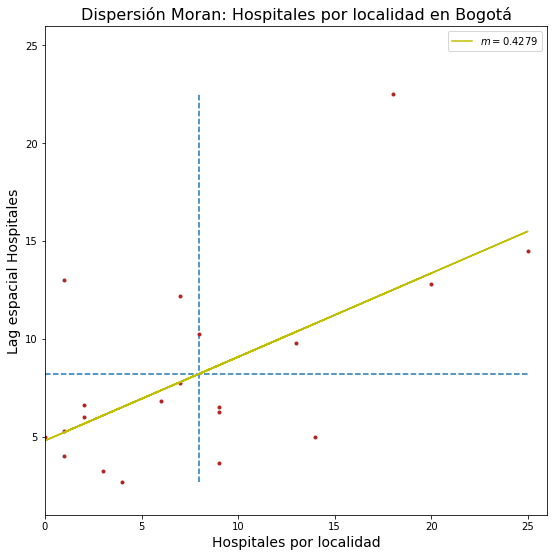

In [5]:
# Graph prevalency by locality and neighbors (spatial lag)
fig, ax = plt.subplots(1, figsize=(9, 9)) 
plt.plot(N_Hospitales, Hos_lag, '.', color='firebrick') # Dispersion plot

plt.vlines(N_Hospitales.mean(), Hos_lag.min(), 
           Hos_lag.max(), linestyle='--')

plt.hlines(Hos_lag.mean(), N_Hospitales.min(), 
           N_Hospitales.max(), linestyle='--')

#Adjust linear regression
b,a = np.polyfit(N_Hospitales, Hos_lag, 1)
# plot regression
plt.plot(N_Hospitales, a + b*N_Hospitales, 'y', label = '$m = {:.4f}$'.format(b)) 

plt.title('Dispersión Moran: Hospitales por localidad en Bogotá', fontsize = 16) 
plt.ylabel('Lag espacial Hospitales', fontsize = 14) # Título eje y
plt.xlabel('Hospitales por localidad', fontsize = 14) # Titulo eje x
plt.xlim(0, N_Hospitales.max()+1) #Zoom en valores de eje x
plt.ylim(1, N_Hospitales.max()+1) # Zoom a valores en eje y
plt.legend(); # Leyenda de la gráfica

In [6]:
# Calculate Moran's I
MoranI_Hos = esda.Moran(LocGDF['N_Hospitals'], LocW)

print('I de Moran :', MoranI_Hos.I, '\n', 'Valor esperado I :', MoranI_Hos.EI, '\n', 'p-valor :', MoranI_Hos.p_norm)

I de Moran : 0.42786301208006794 
 Valor esperado I : -0.05263157894736842 
 p-valor : 0.0009270280790321106


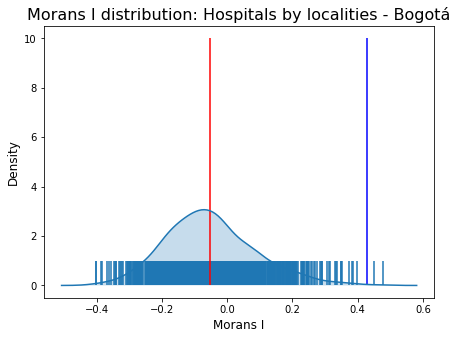

In [7]:
# Graph montecarlo simulation along real calculated Moran I
fig, ax = plt.subplots(1, figsize=(7,5)) #fig 
sns.kdeplot(MoranI_Hos.sim, shade=True, ax=ax) # Graph simlation distribution
plt.vlines(MoranI_Hos.sim, 0, 1) # simulated I
plt.vlines(MoranI_Hos.EI_sim, 0, 10, 'r') # in red Moran I simulated mean 
plt.vlines(MoranI_Hos.I, 0, 10, 'b') # Blue Real Moran I
plt.title('Morans I distribution: Hospitals by localities - Bogotá', fontsize = 16) 
plt.xlabel('Morans I', fontsize = 12) 
plt.ylabel('Density', fontsize = 12); 
plt.savefig('/home/ubuntu/javeriana/MOTUS-PUJ/Step_2/1_spatial/Outputs/Hospitales.jpg')
plt.show()

# IPS

In [8]:
# Calculate spatial lag for IPS
IPS_lag = lps.weights.lag_spatial(LocW, LocGDF['N_IPS'])

N_IPS = LocGDF['N_IPS']

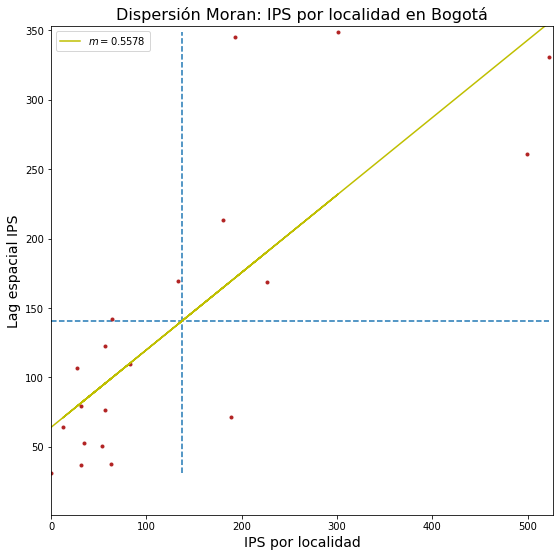

In [9]:
# Plot Moran's I dispersion
fig, ax = plt.subplots(1, figsize=(9, 9))
plt.plot(N_IPS, IPS_lag, '.', color='firebrick') 

plt.vlines(N_IPS.mean(), IPS_lag.min(), 
           IPS_lag.max(), linestyle='--')

plt.hlines(IPS_lag.mean(), N_IPS.min(), 
           N_IPS.max(), linestyle='--')

b,a = np.polyfit(N_IPS, IPS_lag, 1)
plt.plot(N_IPS, a + b*N_IPS, 'y', label = '$m = {:.4f}$'.format(b))

plt.title('Dispersión Moran: IPS por localidad en Bogotá', fontsize = 16) 
plt.ylabel('Lag espacial IPS', fontsize = 14) 
plt.xlabel('IPS por localidad', fontsize = 14)
plt.xlim(0, N_IPS.max()+5) 
plt.ylim(1, IPS_lag.max()+5) 
plt.legend();

In [10]:
# Calculate Moran's I
MoranI_IPS = esda.Moran(LocGDF['N_IPS'], LocW)

print('I de Moran :', MoranI_IPS.I, '\n', 'Valor esperado I :', MoranI_IPS.EI, '\n', 'p-valor :', MoranI_IPS.p_norm)

I de Moran : 0.5577963064596753 
 Valor esperado I : -0.05263157894736842 
 p-valor : 2.5839014903494828e-05


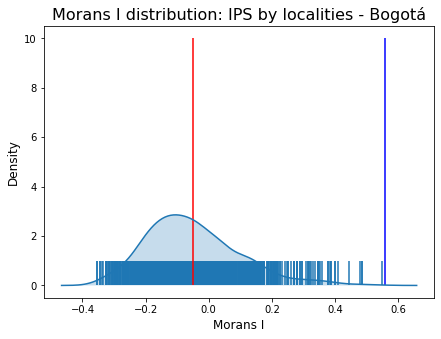

In [11]:
# # Graph montecarlo simulation along real calculated Moran I.
fig, ax = plt.subplots(1, figsize=(7,5)) # Creamos la figura
sns.kdeplot(MoranI_IPS.sim, shade=True, ax=ax) # Graph montecarlo simulation distribution
plt.vlines(MoranI_IPS.sim, 0, 1) # Simulated Moran I
plt.vlines(MoranI_IPS.EI_sim, 0, 10, 'r') # In red simulated Moran I mean
plt.vlines(MoranI_IPS.I, 0, 10, 'b') # In blue real Moran I
plt.title('Morans I distribution: IPS by localities - Bogotá', fontsize = 16) # Título
plt.xlabel('Morans I', fontsize = 12) 
plt.ylabel('Density', fontsize = 12); 
plt.savefig('/home/ubuntu/javeriana/MOTUS-PUJ/Step_2/1_spatial/Outputs/IPS')
plt.show()

# Colegios 

In [13]:
# Calculate spatial lag for schools
Col_lag = lps.weights.lag_spatial(LocW, LocGDF['N_Colegios'])

N_Col = LocGDF['N_Colegios']

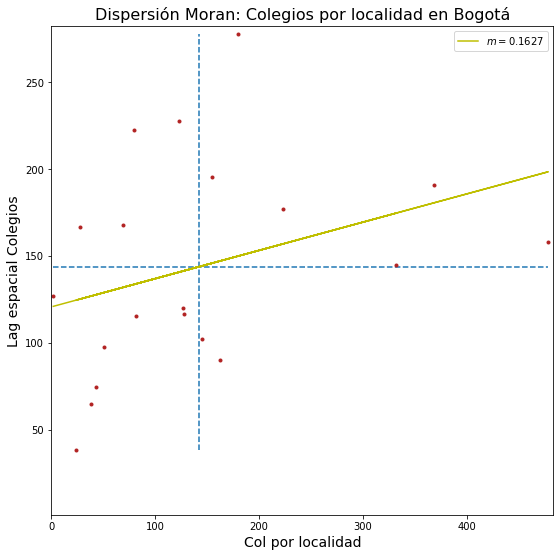

In [14]:
fig, ax = plt.subplots(1, figsize=(9, 9))
plt.plot(N_Col, Col_lag, '.', color='firebrick') 

plt.vlines(N_Col.mean(), Col_lag.min(), 
           Col_lag.max(), linestyle='--')

plt.hlines(Col_lag.mean(), N_Col.min(), 
           N_Col.max(), linestyle='--')


b,a = np.polyfit(N_Col, Col_lag, 1)
plt.plot(N_Col, a + b*N_Col, 'y', label = '$m = {:.4f}$'.format(b))

plt.title('Dispersión Moran: Colegios por localidad en Bogotá', fontsize = 16) 
plt.ylabel('Lag espacial Colegios', fontsize = 14) 
plt.xlabel('Col por localidad', fontsize = 14)
plt.xlim(0, N_Col.max()+5)
plt.ylim(1, Col_lag.max()+5) 
plt.legend();

In [15]:
# Calculate Moran's I
MoranI_Col = esda.Moran(LocGDF['N_Colegios'], LocW)

print('I de Moran :', MoranI_Col.I, '\n', 'Valor esperado I :', MoranI_Col.EI, '\n', 'p-valor :', MoranI_Col.p_norm)

I de Moran : 0.16268041349439993 
 Valor esperado I : -0.05263157894736842 
 p-valor : 0.13780173031886878


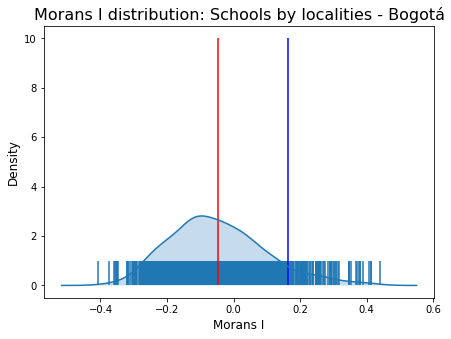

In [16]:
# # Graph montecarlo simulation along real calculated Moran I.
fig, ax = plt.subplots(1, figsize=(7,5)) # Creamos la figura
sns.kdeplot(MoranI_Col.sim, shade=True, ax=ax) # Graph montecarlo simulation distribution
plt.vlines(MoranI_Col.sim, 0, 1) # Simulated Moran I
plt.vlines(MoranI_Col.EI_sim, 0, 10, 'r') # In red simulated Moran I mean
plt.vlines(MoranI_Col.I, 0, 10, 'b') # In blue real Moran I
plt.title('Morans I distribution: Schools by localities - Bogotá', fontsize = 16) # Título
plt.xlabel('Morans I', fontsize = 12) # Titulo eje x
plt.ylabel('Density', fontsize = 12); # Título eje y
plt.savefig('/home/ubuntu/javeriana/MOTUS-PUJ/Step_2/1_spatial/Outputs/Colegios.png')
plt.show()

# Plazas de Mercado

In [17]:
# Calculate spatial lag for IPS
PlazaMer_lag = lps.weights.lag_spatial(LocW, LocGDF['N_PlazaMer'])

N_PlazaMer = LocGDF['N_PlazaMer']

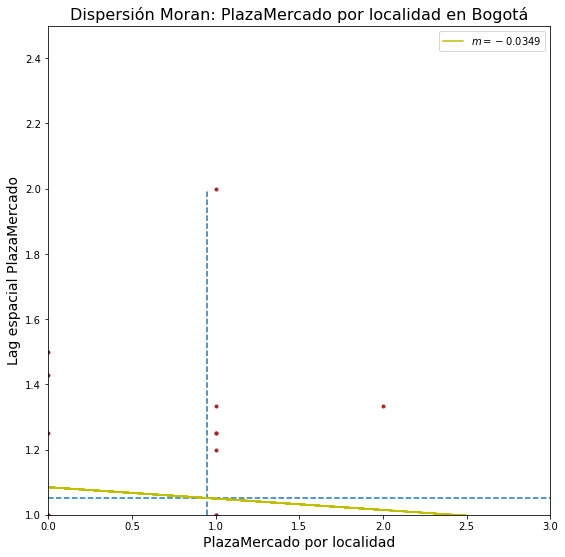

In [18]:
fig, ax = plt.subplots(1, figsize=(9, 9)) 
plt.plot(N_PlazaMer, PlazaMer_lag, '.', color='firebrick') 

plt.vlines(N_PlazaMer.mean(), PlazaMer_lag.min(), 
           PlazaMer_lag.max(), linestyle='--')

plt.hlines(PlazaMer_lag.mean(), N_PlazaMer.min(), 
           N_PlazaMer.max(), linestyle='--')


b,a = np.polyfit(N_PlazaMer, PlazaMer_lag, 1)
plt.plot(N_PlazaMer, a + b*N_PlazaMer, 'y', label = '$m = {:.4f}$'.format(b)) 

plt.title('Dispersión Moran: PlazaMercado por localidad en Bogotá', fontsize = 16)
plt.ylabel('Lag espacial PlazaMercado', fontsize = 14) 
plt.xlabel('PlazaMercado por localidad', fontsize = 14) 
plt.xlim(0, N_PlazaMer.max()) 
plt.ylim(1, PlazaMer_lag.max()+0.5) 
plt.legend(); 

In [19]:
# Calculate Moran's I
MoranI_PlazaMer = esda.Moran(LocGDF['N_PlazaMer'], LocW)

print('I de Moran :', MoranI_PlazaMer.I, '\n', 'Valor esperado I :', MoranI_PlazaMer.EI, '\n', 'p-valor :', MoranI_PlazaMer.p_norm)

I de Moran : -0.0348536248272396 
 Valor esperado I : -0.05263157894736842 
 p-valor : 0.9024763926353918


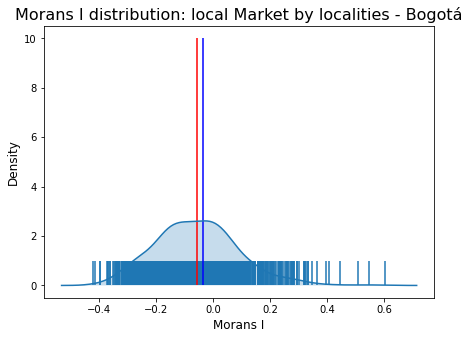

In [20]:
# Graph montecarlo simulation along real calculated Moran I.
fig, ax = plt.subplots(1, figsize=(7,5)) # Creamos la figura
sns.kdeplot(MoranI_PlazaMer.sim, shade=True, ax=ax) # Graph montecarlo simulation distribution
plt.vlines(MoranI_PlazaMer.sim, 0, 1) # Simulated Moran I
plt.vlines(MoranI_PlazaMer.EI_sim, 0, 10, 'r') # In red simulated Moran I mean
plt.vlines(MoranI_PlazaMer.I, 0, 10, 'b') # In blue real Moran I
plt.title('Morans I distribution: local Market by localities - Bogotá', fontsize = 16) # Título
plt.xlabel('Morans I', fontsize = 12) # Titulo eje x
plt.ylabel('Density', fontsize = 12); # Título eje y
plt.savefig('/home/ubuntu/javeriana/MOTUS-PUJ/Step_2/1_spatial/Outputs/PlazMer.jpg')
plt.show()

# Turismo

In [21]:
# Calculate spatial lag for tourism
Turismo_lag = lps.weights.lag_spatial(LocW, LocGDF['N_Turismo'])

N_Turismo = LocGDF['N_Turismo']

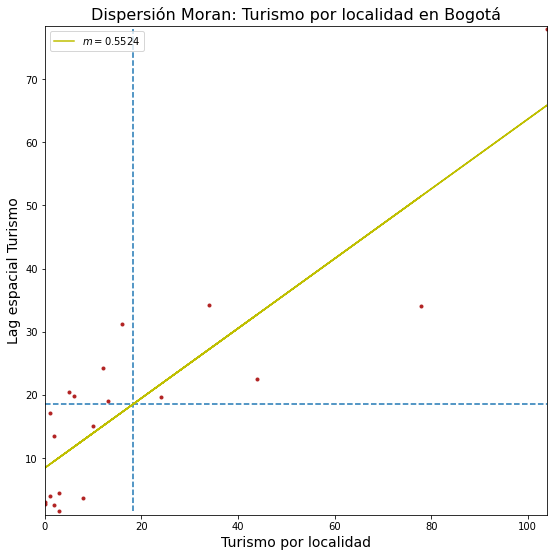

In [22]:

fig, ax = plt.subplots(1, figsize=(9, 9)) 
plt.plot(N_Turismo, Turismo_lag, '.', color='firebrick') 

plt.vlines(N_Turismo.mean(), Turismo_lag.min(), 
           Turismo_lag.max(), linestyle='--')
#Promedio de lag espacial prevalencia covid
plt.hlines(Turismo_lag.mean(), N_Turismo.min(), 
           N_Turismo.max(), linestyle='--')


b,a = np.polyfit(N_Turismo, Turismo_lag, 1)
plt.plot(N_Turismo, a + b*N_Turismo, 'y', label = '$m = {:.4f}$'.format(b)) 

plt.title('Dispersión Moran: Turismo por localidad en Bogotá', fontsize = 16) 
plt.ylabel('Lag espacial Turismo', fontsize = 14) 
plt.xlabel('Turismo por localidad', fontsize = 14) 
plt.xlim(0, N_Turismo.max()) 
plt.ylim(1, Turismo_lag.max()+0.5) 
plt.legend(); 

In [23]:
# Calculate Moran's I
MoranI_Turismo = esda.Moran(LocGDF['N_Turismo'], LocW)

print('I de Moran :', MoranI_Turismo.I, '\n', 'Valor esperado I :', MoranI_Turismo.EI, '\n', 'p-valor :', MoranI_Turismo.p_norm)

I de Moran : 0.5523881638524102 
 Valor esperado I : -0.05263157894736842 
 p-valor : 3.0450847495977484e-05


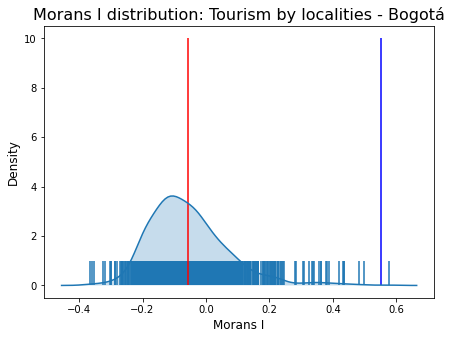

In [24]:
# # Graph montecarlo simulation along real calculated Moran I.
fig, ax = plt.subplots(1, figsize=(7,5)) # Creamos la figura
sns.kdeplot(MoranI_Turismo.sim, shade=True, ax=ax) # Graph montecarlo simulation distribution
plt.vlines(MoranI_Turismo.sim, 0, 1) # Simulated Moran I
plt.vlines(MoranI_Turismo.EI_sim, 0, 10, 'r') # In red simulated Moran I mean
plt.vlines(MoranI_Turismo.I, 0, 10, 'b') # In blue real Moran I
plt.title('Morans I distribution: Tourism by localities - Bogotá', fontsize = 16) # Título
plt.xlabel('Morans I', fontsize = 12) # Titulo eje x
plt.ylabel('Density', fontsize = 12); # Título eje y
plt.savefig('/home/ubuntu/javeriana/MOTUS-PUJ/Step_2/1_spatial/Outputs/Turismo.png')
plt.show()

# SITP

In [25]:
# Calculate spatial lag for IPS
SITP_lag = lps.weights.lag_spatial(LocW, LocGDF['N_SITP'])

N_SITP = LocGDF['N_SITP']

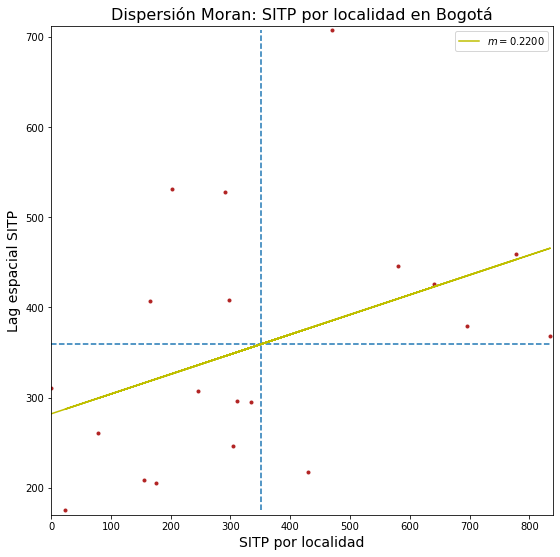

In [26]:
fig, ax = plt.subplots(1, figsize=(9, 9)) 
plt.plot(N_SITP, SITP_lag, '.', color='firebrick') 


plt.vlines(N_SITP.mean(), SITP_lag.min(), 
           SITP_lag.max(), linestyle='--')

plt.hlines(SITP_lag.mean(), N_SITP.min(), 
           N_SITP.max(), linestyle='--')

b,a = np.polyfit(N_SITP, SITP_lag, 1)
plt.plot(N_SITP, a + b*N_SITP, 'y', label = '$m = {:.4f}$'.format(b)) 
plt.title('Dispersión Moran: SITP por localidad en Bogotá', fontsize = 16) 
plt.ylabel('Lag espacial SITP', fontsize = 14) 
plt.xlabel('SITP por localidad', fontsize = 14) 
plt.xlim(0, N_SITP.max()+5) 
plt.ylim(SITP_lag.min()-5, SITP_lag.max()+5) 
plt.legend(); 

In [27]:
# Calculate Moran's I
MoranI_SITP = esda.Moran(LocGDF['N_SITP'], LocW)

print('I de Moran :', MoranI_SITP.I, '\n', 'Valor esperado I :', MoranI_SITP.EI, '\n', 'p-valor :', MoranI_SITP.p_norm)

I de Moran : 0.22001930334638964 
 Valor esperado I : -0.05263157894736842 
 p-valor : 0.060212750412577565


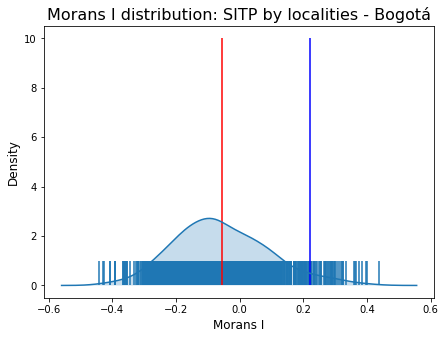

In [28]:
# # Graph montecarlo simulation along real calculated Moran I.
fig, ax = plt.subplots(1, figsize=(7,5)) # Creamos la figura
sns.kdeplot(MoranI_SITP.sim, shade=True, ax=ax) # Graph montecarlo simulation distribution
plt.vlines(MoranI_SITP.sim, 0, 1) # Simulated Moran I
plt.vlines(MoranI_SITP.EI_sim, 0, 10, 'r') # In red simulated Moran I mean
plt.vlines(MoranI_SITP.I, 0, 10, 'b') # In blue real Moran I
plt.title('Morans I distribution: SITP by localities - Bogotá', fontsize = 16) # Título
plt.xlabel('Morans I', fontsize = 12) # Titulo eje x
plt.ylabel('Density', fontsize = 12); # Título eje y
plt.savefig('/home/ubuntu/javeriana/MOTUS-PUJ/Step_2/1_spatial/Outputs/SITP.jpg')
plt.show()

# Establecimientos Comerciales

In [29]:
# Calculate spatial lag for IPS
Comercio_lag = lps.weights.lag_spatial(LocW, LocGDF['N_Comercio'])

N_Comercio = LocGDF['N_Comercio']

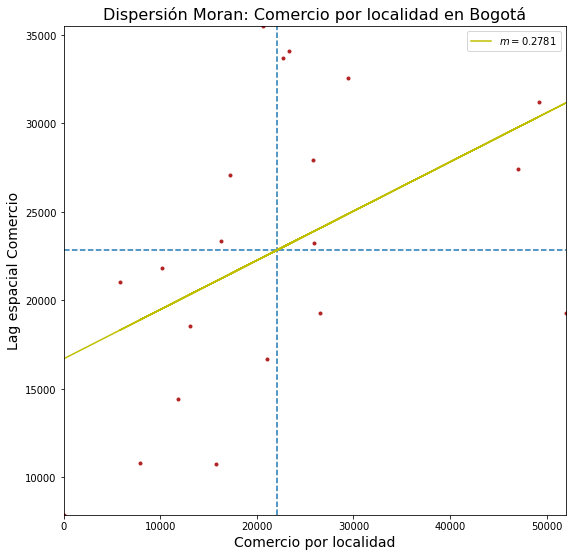

In [30]:

fig, ax = plt.subplots(1, figsize=(9, 9)) 
plt.plot(N_Comercio, Comercio_lag, '.', color='firebrick')


plt.vlines(N_Comercio.mean(), Comercio_lag.min(), 
           Comercio_lag.max(), linestyle='--')

plt.hlines(Comercio_lag.mean(), N_Comercio.min(), 
           N_Comercio.max(), linestyle='--')
b,a = np.polyfit(N_Comercio, Comercio_lag, 1)
plt.plot(N_Comercio, a + b*N_Comercio, 'y', label = '$m = {:.4f}$'.format(b))

plt.title('Dispersión Moran: Comercio por localidad en Bogotá', fontsize = 16) 
plt.ylabel('Lag espacial Comercio', fontsize = 14) 
plt.xlabel('Comercio por localidad', fontsize = 14) 
plt.xlim(0, N_Comercio.max()+5) 
plt.ylim(Comercio_lag.min()-5, Comercio_lag.max()+5) 
plt.legend(); 

In [31]:
# Calculate Moran's I
MoranI_Comercio = esda.Moran(LocGDF['N_Comercio'], LocW)

print('I de Moran :', MoranI_Comercio.I, '\n', 'Valor esperado I :', MoranI_Comercio.EI, '\n', 'p-valor :', MoranI_Comercio.p_norm)

I de Moran : 0.2780632016873635 
 Valor esperado I : -0.05263157894736842 
 p-valor : 0.02264940547542671


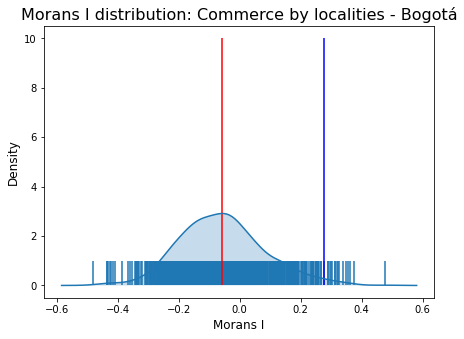

In [32]:
# # Graph montecarlo simulation along real calculated Moran I.
fig, ax = plt.subplots(1, figsize=(7,5)) # Creamos la figura
sns.kdeplot(MoranI_Comercio.sim, shade=True, ax=ax) # Graph montecarlo simulation distribution
plt.vlines(MoranI_Comercio.sim, 0, 1) # Simulated Moran I
plt.vlines(MoranI_Comercio.EI_sim, 0, 10, 'r') # In red simulated Moran I mean
plt.vlines(MoranI_Comercio.I, 0, 10, 'b') # In blue real Moran I
plt.title('Morans I distribution: Commerce by localities - Bogotá', fontsize = 16) # Título
plt.xlabel('Morans I', fontsize = 12) # Titulo eje x
plt.ylabel('Density', fontsize = 12); # Título eje y
plt.savefig('/home/ubuntu/javeriana/MOTUS-PUJ/Step_2/1_spatial/Outputs/Comercio.png')
plt.show()

# Rt in a specific time moment

### Get Rt DF for localities in Bogotá

In [24]:
# Reading localities R_t
base_path = '/home/ubuntu/javeriana/MOTUS-PUJ/Step_1/RT_outputs/'

loc_R_list = ['usaquen_R.pkl', 'chapinero_R.pkl', 'santafe_R.pkl', 'sancristobal_R.pkl', 'usme_R.pkl',
             'tunjuelito_R.pkl', 'bosa_R.pkl', 'kennedy_R.pkl', 'fontibon_R.pkl', 'engativa_R.pkl',
             'suba_R.pkl', 'barriosunidos_R.pkl', 'teusaquillo_R.pkl', 'losmartires_R.pkl', 'antonionariño_R.pkl',
             'puentearanda_R.pkl', 'lacandelaria_R.pkl', 'rafaeluribe_R.pkl', 'ciudadbolivar_R.pkl', 'sumapaz_R.pkl']

R_list = []
# Read Rt in every locality in Bogotá
for i in range(len(loc_R_list)):
    path_file = base_path+loc_R_list[i]
    R_list.append(pd.read_pickle(path_file))

# Reset index
for i in range(len(loc_R_list)):
    R_list[i].reset_index(drop=False, inplace=True)

R_df = pd.DataFrame(index = R_list[0]['Time Stamp'])
R_df.reset_index(drop=False, inplace=True)

# Create single Df with all Rt in Bogotá
for i in range(len(loc_R_list)):
    R_df[loc_R_list[i]] = 0
    R_df[loc_R_list[i]] = R_list[i]['R'].tolist()
    
R_df.fillna(0) #Fill NaN values with 0 for early non converging estimations
R_df.head(5)

,Time Stamp,usaquen_R.pkl,chapinero_R.pkl,santafe_R.pkl,sancristobal_R.pkl,usme_R.pkl,tunjuelito_R.pkl,bosa_R.pkl,kennedy_R.pkl,fontibon_R.pkl,...,suba_R.pkl,barriosunidos_R.pkl,teusaquillo_R.pkl,losmartires_R.pkl,antonionariño_R.pkl,puentearanda_R.pkl,lacandelaria_R.pkl,rafaeluribe_R.pkl,ciudadbolivar_R.pkl,sumapaz_R.pkl
0,2020-02-26,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,2.634860,0.0,0.0,0.0
1,2020-02-27,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,24.513231,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,1.825152,0.0,0.0,0.0
2,2020-02-28,25.168460,0.0,0.0,0.0,0.0,0.0,0.0,12.864529,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,1.015647,0.0,0.0,0.0
3,2020-02-29,13.411527,0.0,0.0,0.0,0.0,0.0,0.0,9.060387,25.617419,...,25.617427,25.617419,0.0,0.0,0.0,0.0,0.280187,0.0,0.0,0.0
4,2020-03-01,10.052326,0.0,0.0,0.0,0.0,0.0,0.0,6.864376,13.604958,...,13.604997,13.604958,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [25]:
LocGDF.head(2)

,Name,Id,geometry,Hospitals,N_Hospitals,IPS,N_IPS,Colegios,N_Colegios,PlazaMer,N_PlazaMer,Turismo,N_Turismo,SITP,N_SITP,Comercio,N_Comercio
0,usaquen,1,"POLYGON ((-74.01116 4.66459, -74.01117 4.66460...","[POINT (-74.03049903995752 4.696348669863934),...",9,"[POINT (-74.05239073194667 4.707054002140524),...",522,"[POINT (-74.05148000010526 4.707330000137796),...",155,[],0,"[POINT (-74.03800200007751 4.706198999783834),...",24,"[POINT (-74.04845399989965 4.709916000204656),...",641,"[POINT (-74.05215223819999 4.70672435378), POI...",29430
1,chapinero,2,"POLYGON ((-74.01116 4.66459, -74.01154 4.66461...",[],0,"[POINT (-74.06457413998453 4.630227659978573),...",499,"[POINT (-74.06135000033767 4.657600000270593),...",28,[],0,"[POINT (-74.05759900042719 4.65167600012609), ...",34,"[POINT (-74.0601199998473 4.628508999872917), ...",298,"[POINT (-74.05968344760001 4.62798567818), POI...",25759


In [26]:
LocIM = LocGDF.copy()
# Constructing DataFrame in order to applly several regressions.
regBog_df = LocGDF.copy()

peak_dates = ['01/05/2020' ,'01/08/2020', '01/11/2020', '10/01/2021', '01/03/2021', '01/05/2021',
             '10/06/2021', '10/08/2021']

peak_dates2 = ['01-05-2020' ,'01-08-2020', '01-11-2020', '10-01-2021', '01-03-2021', '01-05-2021',
             '10-06-2021', '10-08-2021']

for i in range(len(peak_dates)):
    peak_dates[i] = dt.datetime.strptime(peak_dates[i], "%d/%m/%Y")
    R_row = R_df.loc[R_df['Time Stamp'] == peak_dates[i]]
    R_row = R_row.iloc[:, 1:].values.tolist()
    R_row = R_row[0]
    LocIM['Rt'+'_'+str(peak_dates[i])] = R_row

In [55]:
# Calculate spatial lag for R_t
i = 7
Rt_lag = lps.weights.lag_spatial(LocW, LocIM['Rt'+'_'+str(peak_dates[i])])

R_t = LocIM['Rt'+'_'+str(peak_dates[i])]

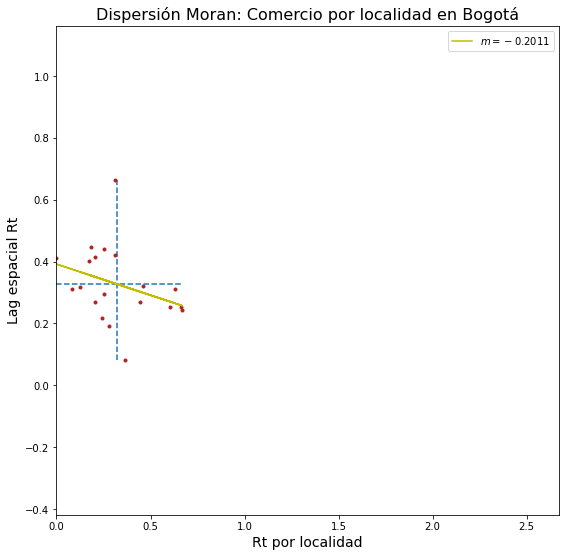

In [56]:
# Vamos a graficar la prevalencia de covid de cada municipio y la prevalencia promedio de sus vecinos (lag espacial)
fig, ax = plt.subplots(1, figsize=(9, 9)) # Creamos la figura
plt.plot(R_t, Rt_lag, '.', color='firebrick') # Creamos el gráfico de dispersión
# Cada punto es un municipio ubicado en su valor de prevalencia y de su lag espacial de prevalencia (promedio de prevalencia de sus vecinos)

#Promedio de prevalencia de covid por municipio
plt.vlines(R_t.mean(), Rt_lag.min(), 
           Rt_lag.max(), linestyle='--')
#Promedio de lag espacial prevalencia covid
plt.hlines(Rt_lag.mean(), R_t.min(), 
           R_t.max(), linestyle='--')

#Ajustamos una regresión lineal a estos datos
b,a = np.polyfit(R_t, Rt_lag, 1)
plt.plot(R_t, a + b*R_t, 'y', label = '$m = {:.4f}$'.format(b)) # Graficamos la regresión lineal
# La pendiente de la regresión es la correlación entre la prevalencia y el lag espacial de la prevalencia

plt.title('Dispersión Moran: Comercio por localidad en Bogotá', fontsize = 16) # Título
plt.ylabel('Lag espacial Rt', fontsize = 14) # Título eje y
plt.xlabel('Rt por localidad', fontsize = 14) # Titulo eje x
plt.xlim(0, R_t.max()+2) #Zoom en valores de eje x
plt.ylim(Rt_lag.min()-0.5, Rt_lag.max()+0.5) # Zoom a valores en eje y
plt.legend(); # Leyenda de la gráfica

In [57]:
# Calculate Moran's I
MoranI_Rt_0 = esda.Moran(LocIM['Rt'+'_'+str(peak_dates[i])], LocW)

print('I de Moran :', MoranI_Rt_0.I, '\n', 'Valor esperado I :', MoranI_Rt_0.EI, '\n', 'p-valor :', MoranI_Rt_0.p_norm)

I de Moran : -0.20110459231968442 
 Valor esperado I : -0.05263157894736842 
 p-valor : 0.3061457966887784


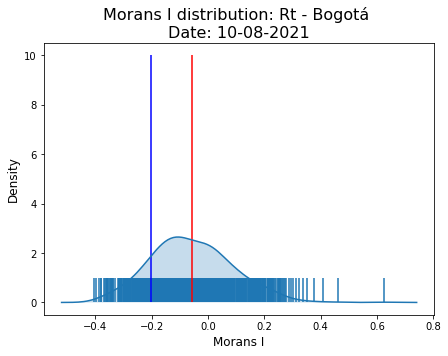

In [58]:
# # Graph montecarlo simulation along real calculated Moran I.
fig, ax = plt.subplots(1, figsize=(7,5)) # Creamos la figura
sns.kdeplot(MoranI_Rt_0.sim, shade=True, ax=ax) # Graph montecarlo simulation distribution
plt.vlines(MoranI_Rt_0.sim, 0, 1) # Simulated Moran I
plt.vlines(MoranI_Rt_0.EI_sim, 0, 10, 'r') # In red simulated Moran I mean
plt.vlines(MoranI_Rt_0.I, 0, 10, 'b') # In blue real Moran I
plt.title('Morans I distribution: Rt - Bogotá \n'+'Date: '+peak_dates2[i], fontsize = 16) # Título
plt.xlabel('Morans I', fontsize = 12) # Titulo eje x
plt.ylabel('Density', fontsize = 12); # Título eje y
file_name = 'Rt'+peak_dates2[i]
#plt.savefig('/home/ubuntu/javeriana/MOTUS-PUJ/Graficas/Regresiones/Moran_I/'+file_name)
plt.show()